<a href="https://colab.research.google.com/github/iPranjalSinha/Machine-Learning-Python-Notebooks-/blob/main/1_4_Regression_Support_Vector_for_Regression_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Data preprocessing**

## 1.1. Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.2. Importing the dataset

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")

## 1.3. Exploring the dataset

In [ ]:
print(dataset.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [ ]:
print(dataset.shape)

(10, 3)


In [ ]:
print(dataset.columns)

Index(['Position', 'Level', 'Salary'], dtype='object')


## 1.4. Identifying independent variables and dependent variables

In [ ]:
# Independent variable
X = dataset.iloc[:, 1:-1].values

# Dependent variable
y = dataset.iloc[:, -1].values

In [ ]:
y = y.reshape(len(y),1)

## 1.5. Handling missing data

### 1.5.1. Checking if there is any missing data

In [ ]:
print(dataset.isnull().values.any())

False


### 1.5.2. Handling missing data

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

## 1.6. Encoding categorical data

In [ ]:
# # Encoding the independent variable
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [ ]:
# # Encoding the dependent variable
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

## 1.7. Splitting the dataset into a training set and test set

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## 1.8. Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)

# **Part 2: Creating a model**

## 2.1. Training the model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)
# regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 2.2. Predicting the test set results

In [ ]:
# y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

In [ ]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## 2.2. Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

# **Part 3: Visualizing the results**

## 3.1. Visualizing the results

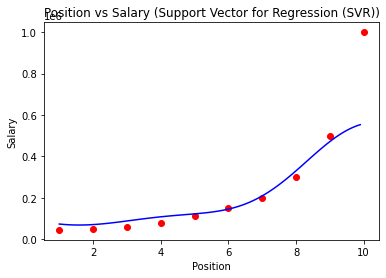

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Position vs Salary (Support Vector for Regression (SVR))')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# **Part 4: Evaluating model's performance**

## 4.1. R-Squared Score

In [ ]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)